Project 1 -
Kimi Cardoso Kreilgaard (twn176)

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Data

In [2]:
# Defining the submatrices A, B and y
A_mat = np.array([
    [22.13831203, 0.16279204, 0.02353879, 0.02507880,-0.02243145,-0.02951967,-0.02401863],
    [0.16279204, 29.41831006, 0.02191543,-0.06341569, 0.02192010, 0.03284020, 0.03014052],
    [0.02353879,  0.02191543, 1.60947260,-0.01788177, 0.07075279, 0.03659182, 0.06105488],
    [0.02507880, -0.06341569,-0.01788177, 9.36187184,-0.07751218, 0.00541094,-0.10660903],
    [-0.02243145, 0.02192010, 0.07075279,-0.07751218, 0.71033323, 0.10958126, 0.12061597],
    [-0.02951967, 0.03284020, 0.03659182, 0.00541094, 0.10958126, 8.38326265, 0.06673979],
    [-0.02401863, 0.03014052, 0.06105488,-0.10660903, 0.12061597, 0.06673979, 1.15733569]]);

B_mat = np.array([
    [-0.03423002, 0.09822473,-0.00832308,-0.02524951,-0.00015116, 0.05321264, 0.01834117],
    [ 0.09822473,-0.51929354,-0.02050445, 0.10769768,-0.02394699,-0.04550922,-0.02907560],
    [-0.00832308,-0.02050445,-0.11285991, 0.04843759,-0.06732213,-0.08106876,-0.13042524],
    [-0.02524951, 0.10769768, 0.04843759,-0.10760461, 0.09008724, 0.05284246, 0.10728227],
    [-0.00015116,-0.02394699,-0.06732213, 0.09008724,-0.07596617,-0.02290627,-0.12421902],
    [ 0.05321264,-0.04550922,-0.08106876, 0.05284246,-0.02290627,-0.07399581,-0.07509467],
    [ 0.01834117,-0.02907560,-0.13042524, 0.10728227,-0.12421902,-0.07509467,-0.16777868]]);

y_vec = np.array([-0.05677315,-0.00902581, 0.16002152, 0.07001784, 0.67801388,-0.10904168, 0.90505180]);

In [3]:
# Construct the matrices E
E_mat = np.block([ [A_mat, B_mat], [B_mat, A_mat] ])

# Check the shape of Emat
print(np.shape(E_mat))

(14, 14)


Since we can only subtract matrices of the same dimensions I assume the identity matrix $\mathbf{I}$ and the zero-matrix $\mathbf{0}$ should have dimenssions each 7x7

In [4]:
# Construct the matrix S
ZERO_mat = np.zeros([7,7])
I_mat = np.identity(7)

S_mat = np.block([ [I_mat, ZERO_mat], [ZERO_mat, -I_mat] ])

# Chech shape
print(np.shape(S_mat))

(14, 14)


In [5]:
# Construct the vector z
z_vec = np.concatenate([ [y_vec],[-y_vec] ], axis=1).flatten()

# Check shape
print(np.shape(z_vec))

(14,)


# Questions for Week 1

## A(1)

Write a small function that computes the condition number of a matrix under the maxnorm:
$$ cond_{\infty}(\mathbf{M}) = ||M||_{\infty} ||M^{-1}||_{\infty} $$

The infinity norm = the maximum absolute row sum. Put simply, we sum the absolute values along each row and then take the biggest answer.

In [6]:
# Function to calculate the max norm
def max_norm(M):
    
    # Get the absolute value of the matrix
    M_abs = np.absolute(M)
    
    # Sum each row of the absolute matrix
    M_sum = np.sum(M_abs, axis=1)
    
    # Return the largest row sum
    return np.max(M_sum) 

In [7]:
# We define a function to do calculate the condition number of a matrix
def cond(M):
    
    # Calculate the inverse matrix M^-1
    Minv = np.linalg.inv(M)
    
    # Calculate the max norms and multiply them together to get the condition number
    cond_number = max_norm(M) * max_norm(Minv)
    
    return cond_number

## A(2)

For three frequencies, calculate the condition number for the matrix $\mathbf{E}-\omega \mathbf{S}$.

In [8]:
# Define the three frequencies
omegas = [1.300, 1.607, 2.700]

In [9]:
# Lets calculate the condition numbers
condition_numbers = [cond(E_mat - omegas[i] * S_mat) for i in np.arange(3)]
print(condition_numbers)

[303.0741906688338, 327825.2278438225, 35.55204847098013]


The right-hand-side z is given with 8 significant digits. How many significant digits could we guarantee in the solution x if everything else were assumed exact? Why?

Since we only have an uncertainty in z the condition something formula becomes:
$$ \frac{\left|\left|\Delta x\right|\right|_{\infty}}{\left|\left|x\right|\right|_{\infty}}  = cond_{\infty}(\mathbf{E}-\omega\mathbf{S})  \frac{\left|\left|\Delta z\right|\right|_{\infty}}{\left|\left|z\right|\right|_{\infty}} $$

We are told that z is given with 8 significant digits, thus we know that $\left|\left| \frac{\Delta z}{z} \right|\right|_{\infty} = 10^{-8}$ 

To answer how many significant digits we can guarantee in the solution x, we need to calculate the left hand side (the relative output) for each omega and take the negative log10 to the LHS. The reason we take the negative log10 is that we are interested in the difference in digits of x and delta x.

For example, let's say we know that:
$x=10^a$ and $\sigma=10^b$, the we know that the fractional error is:
$$ \frac{sigma_x}{x} = \frac{10^b}{10^a} = 10^{(b-a)} $$
$$ \log_{10}\left(\frac{\sigma_x}{x}\right) = b - a $$
$$ - \log_{10}\left(\frac{\sigma_x}{x}\right) = a - b $$

Another way to say this is that if the relative output has n significant digits then per definition: relative output = $10^{-n}$. From the calculations we make we get this: a number that corresponds to 10 upliftet to some exponent that is our number of significant digits in the output x. Since we want the actual number n, we take the negative log10 to get n from $10^{-n}$.

In [10]:
frac_err_xs = [condition_numbers[i] * 10**(-8) for i in np.arange(3)]
print(frac_err_xs)

[3.030741906688338e-06, 0.003278252278438225, 3.5552048470980133e-07]


In [11]:
sig_digits = [-np.log10(frac_err_xs[i]) for i in np.arange(3)]
print(sig_digits)

[5.518451045906735, 2.4843576282768707, 6.449135370630066]


## B(1)

Since $\mathbf{X}$ is the solution to the system of linear equation it is on X (the output) that we find the relative forward error. Whereas the backward error is related to the error in the data we used as input versus the ideal data we should have used.

If we have a function $y=f(x)$ then the forward error is $|\Delta y| = |\hat{y}-y|$ where $\hat{y}$ is an approximation to $y$. The RELATIVE forward error in turn is $\frac{|\Delta y|}{y}$.
Backward error is defined as the same but on the input x instead.

Look at p. 59 equation with |E| over |A|. Here our matrix A is E-omegaS and E is the error on A. See picture on phone for more. The equation becomes
$$  \frac{\left|\left| \Delta x\right|\right|_{\infty}}{\left|\left| x\right|\right|_{\infty}}  = cond_{\infty}(\mathbf{E}-\omega\mathbf{S})  \frac{\left|\left|\delta \omega \mathbf{S}\right|\right|_{\infty}}{\left|\left|\mathbf{E}-\omega\mathbf{S}\right|\right|_{\infty}} $$
where the right hand side is the bound on the relative forward error since x is the output (soultion) when working with matrices.

In [12]:
# Define error on omega
delta_omega = 0.5*10**(-3)

# We have the condition numbers from before in "condition_numbers"

# Calculate |E|/|A|
E_A = [max_norm(delta_omega*S_mat) / max_norm(E_mat - omegas[i]*S_mat) for i in np.arange(3)]
print(E_A)

# Calculate the bounds
forward_bounds = [condition_numbers[i] * E_A[i] for i in np.arange(3)]
print('Bounds', forward_bounds)

# Number of significant digits if omega is given with 3 digits after the comma
sig_digits2 = [-np.log10(forward_bounds[i]) for i in np.arange(3)]
print('Significant Digits', sig_digits2)

[1.567615017579431e-05, 1.5526703231793995e-05, 1.5017005444678119e-05]
Bounds [0.004751036527331957, 5.090045024626281, 0.0005338853054581691]
Significant Digits [2.323211630587377, -0.7067216239595996, 3.27255203240348]


## C
We will test the following functions against the linear equation: Ax=y

test them after making ALL three functions.

In [13]:
A_test = np.array([ [2,1,1],[4,1,4],[-6, -5, 3] ])
print(A_test)

y_test = np.array([ 4, 11, 4 ]).reshape(3,1)
print(y_test)

[[ 2  1  1]
 [ 4  1  4]
 [-6 -5  3]]
[[ 4]
 [11]
 [ 4]]


## C(1)

Implementing a function: L,U = lu factorize(A), which takes a square matrix M as input and returns two
square matrices: A triangular matrix L and upper triangular matrix U such that
M = LU.

In [14]:
# Define a function to perform LU factorization on a square matrix M
def lu_factorize(M):
    
    # Check that the input matrix is in fact square
    if M.shape[0] != M.shape[1]:
        print('Input matrix is not square')
    
    # Initialise L as an identity matrix of the same dimensions as M
    n = M.shape[0]
    L = np.identity(n)
    A = M.copy() #copy to not change input
    U = np.zeros(A.shape)
    
    # Loop over all columns except the last one
    for k in range(n-1):
        
        # Stop if the pivot is zero (the element in the diagonal of given column)
        if A[k,k] == 0:
            print('Encountered pivot equal to zero')
            return
        
        # Loop over the subdiagonal rows in the given column
        for i in range(k+1, n):
            
            # Find the value for all subdiagonal elements in L
            L[i,k] = A[i,k] / A[k,k]
            
        # Loop again, combinations of j,i,k will give us elements of the submatrix in bottom right    
        for j in range(k+1,n):
            for i in range(k+1,n):
                
                # Apply transoformation to the remaining submatrix
                A[i,j] = A[i,j] - L[i,k]*A[k,j]
    
        # Assign upper triangular part of the transformed M to U
        U[:k+1,k] = A[:k+1,k] #rows, columns k+1 because the last element is not included when using :
    
    # Assign also the last column which is not used above because we range until n-1
    U[:, -1] = A[:, -1]
    
    return L, U

We check that it works as expected by seeing if the output L times U is in fact A

In [15]:
A_test = np.array([ [2,1,1],[4,1,4],[-6, -5, 3] ])
A_test

array([[ 2,  1,  1],
       [ 4,  1,  4],
       [-6, -5,  3]])

In [16]:
L_test, U_test = lu_factorize(A_test)

# Print to see if upper triangular
print(L_test)
print(U_test)

[[ 1.  0.  0.]
 [ 2.  1.  0.]
 [-3.  2.  1.]]
[[ 2.  1.  1.]
 [ 0. -1.  2.]
 [ 0.  0.  2.]]


In [17]:
L_test @ U_test

array([[ 2.,  1.,  1.],
       [ 4.,  1.,  4.],
       [-6., -5.,  3.]])

## C(2)
y = forward substitute(L,z), which takes a square lower triangular matrix L and a
vector b as input, and returns the solution vector y to Ly = b.

In [18]:
# We define the function
def forward_substitute(L, b):
    
    # Make empty array for solution vector y
    n = L.shape[0]
    y_vec = np.zeros(n)
    
    # Make copy of b so we dont change the values when updating
    b_copy = b.copy()
    
    # Loop over columns in the L matrix
    for j in range(n):
        
        # Stop if matrix is singular
        if L[j,j] == 0:
            print('Singular matrix encountered. Cannot procede.')
            return
        
        # Compute solution component, i.e. the solution to the i'th linear equation
        y_vec[j] = b_copy[j] / L[j,j]
        
        # Update right hand side
        for i in range(j+1,n):
            b_copy[i] = b_copy[i] - L[i,j] * y_vec[j]
        
    return y_vec

In [19]:
print(np.linalg.solve(L_test,y_test))
print(forward_substitute(L_test,y_test))

[[ 4.]
 [ 3.]
 [10.]]
[ 4.  3. 10.]


## C(3)
x = back substitute(U,y), which takes a square upper triangular matrix U and a
vector y as input, and returns the solution vector x to Ux = y.

In [650]:
def back_substitute(U,y):
    
    # Make empty array for solution vector x
    n_rows, n_cols = U.shape
    x_vec = np.zeros(n_cols)
    
    # Make copy of y so we dont change the values when updating
    y_copy = y.copy()
    
    # Loop backwards over columns
    
    for j in reversed(range(n_rows)):
        
        # Stop if matrix is singular
        if j+1 > n_cols: continue
        else:
            if U[j,j] == 0:
                print('Singular matrix encountered. Cannot procede.')
                return
        
        # Compute solution component
        x_vec[j] = y_copy[j] / U[j,j]
        
        for i in range(0,j):
            y_copy[i] = y_copy[i] - U[i,j] * x_vec[j]
            
    return x_vec

In [651]:
print(np.linalg.solve(U_test,y_test))
print(back_substitute(U_test,y_test))

[[ 4.5]
 [-7. ]
 [ 2. ]]
[ 4.5 -7.   2. ]


## Check that it works
We start out with a linear system of equations: $\mathbf{Ax}=\mathbf{b}$

With LU-factorization the equation becomes: $\mathbf{LUx} = \mathbf{b}$

We let $\mathbf{Ux}=\mathbf{y}$. The we can start by solving the equation: $\mathbf{Ly} = \mathbf{b}$

This allows us to find $\mathbf{y}$, meaning that we can now solve for $\mathbf{x}$ by solving $\mathbf{Ux}=\mathbf{y}$.

In [22]:
# This is the system we will check
A_test = np.array([ [2,1,1],[4,1,4],[-6, -5, 3] ])
print(A_test)

y_test = np.array([ 4, 11, 4 ]).reshape(3,1)
print(y_test)

[[ 2  1  1]
 [ 4  1  4]
 [-6 -5  3]]
[[ 4]
 [11]
 [ 4]]


In [750]:
# Solving it with numpy linalg to see what x ought to be.
sol_numpy = np.linalg.solve(A_test,y_test)
sol_numpy

array([[-4.],
       [ 7.],
       [ 5.]])

In [24]:
# Solving it ourselves by first making a function that combines the stuff
def linear_solver(A,b): 
    """
    A = coefficient matrix
    b = dependent variable values
    """
    A = A.copy()
    L, U = lu_factorize(A)
    y = forward_substitute(L, b)
    x = back_substitute(U, y)
    
    return x

In [25]:
my_sol = linear_solver(A_test, y_test)
my_sol

array([-4.,  7.,  5.])

## d
Implement a function alpha = solve_alpha(omega) for calculating the frequency-dependent
polarizability $\alpha(\omega)=\mathbf{z}^T \mathbf{x}$ for water in the given approximation. This routine should solve
Equation (2) by LU-factorization using your own three routines from (c).

Equation (2) is:
$$ (\mathbf{E}-\omega\mathbf{S})\mathbf{x} = \mathbf{z} $$ 

Step 1 is solving for $\mathbf{x}$ through lu factorization and the other routines in (c). When we have $\mathbf{x}$ we can use this along with the given vector z to calculate alpha.

In [29]:
# Define the function
def solve_alpha(omega):
    
    # Get matrix that is multiplied on x on the left hand side
    matrix = E_mat - omega*S_mat
    
    # Calculate x
    X = linear_solver(matrix, z_vec)
    
    # Calculate omega
    alpha = np.dot(z_vec.T, X)
    
    return alpha

## d(1)
Using your routine, make a table of the polarizabilities for the frequencies given in (a) and their perturbations, i.e. for $ \omega = (1.300 \pm \delta\omega, 1.607 \pm \delta\omega, 2.700 \pm \delta\omega)) $ with $ \delta \omega = 0.5 \cdot 10^{-3} $

In [30]:
[solve_alpha(omegas[i]) for i in np.arange(3)]

[-4.875948325641522, -434.96060688668655, -0.3759432363856515]

## d(2)
Which error-bound is the correct one to understand the variation of the calculated polarizabilities
due to the perturbation: (a) or (b) or both? Explain why. Do your calculated
values fall within the bounds you calculated above?

since we have an error on omega and still assume z is exact the right error bound will be the one given in (b). See pictures on phone for exact estimation but the idea is we can use the method in (b) to find a bound on x. the error bound on alpha will be proportional to that error. If we use a triangle inequality we can estimate a bound on alpha but that is not really the question.

## e(1) and e(2)
Compute a table of $\alpha(\omega)$ for 1000 evenly spaced values in the interval [1.2;4] using
your routine from (d), and plot the values. (2) Can you explain what happens to the linear
system of Equation (2) around the frequency $\omega = 1.60686978$, and how is this reflected in
$\alpha(\omega)$?

In [31]:
# Define omegas in the interval
omegas_many = np.linspace(1.2,4,1000)

# Calculate the corresponding alphas
alphas_many = [solve_alpha(omegas_many[i]) for i in range(len(omegas_many)) ]

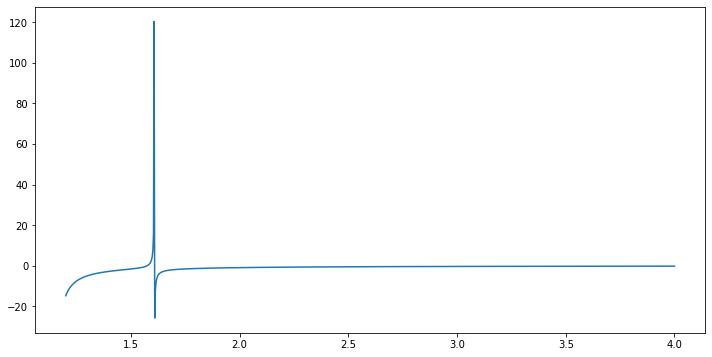

In [41]:
# Plotting it
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(omegas_many, alphas_many)

In [43]:
solve_alpha(1.60686978)

-22926762.440637004

singular matricer har uendelig condition number så man kan tjekke sådan eller for 0 determinant.

In [44]:
cond(E_mat-1.60686978*S_mat)

17341583414.84385

In [45]:
np.linalg.det(E_mat-1.60686978*S_mat)

-51.779268744896555

# Questions for week 2

## f(1)
Implement a function that:
Q,R = householder QR(A), which takes as input a rectangular matrix $A: mxn$ and
uses the Householder method to compute its QR decomposition. Check that $Q: mxm$
is orthogonal, i.e., $Q^TQ = QQT = I, and that the upper triangular matrix R: m   n
satis es A = QR.

I couldnt get the pseudocode from the book to work, so instead I followed the description in: http://rosettacode.org/wiki/QR_decomposition

maybe use copysign instead as in hint

In [614]:
def householder_qr(A, rounded=False, decimals=4):
    """
    Description
    """
    
    # Inititalise R as a copy of A to not change the original matrix - same goes for b
    R = A.copy()
    
    # Get dimensions of matrix A
    n_rows, n_cols = A.shape
    
    # Check that m>n so the procedure is possible
    if n_rows<n_cols:
        print('Encountered matrix with more columns than rows. System is unsolvable.')
        return
    
    # Initialise Q as an identity matrix
    Q = np.identity(n_rows)
    
    ######################################
    ### Compute the householder vector ###
    ######################################
    
    # Loop over columns
    for j in range(n_cols):
        
        # Let a be the j'th column of the matrix A or submatrix depending on iteration
        a = R[j:,j]
        
        # Calculate the norm of a
        norm_a = np.sqrt( np.sum(a**2) )
        
        # Calculate the alpha which is the proper sign (to avoid nummerical cancellation errors) times the norm
        alpha = -np.sign(a[0]) * norm_a
        
        # Make the first standard basis vector for the matrix or subbmatrix
        e = np.zeros_like(a)
        e[0] = 1
        
        # Initialise a householder vector 'u': the vector 'a' minus 'alpha' on the diagonal element
        v = a - alpha*e
        
        # Normalise it
        v = v/np.sqrt(np.sum(v**2))

        """
        check that something is not zero - is it a[j]?
        """
        #############################################
        ### Compute the householder vector matrix ###
        #############################################
    
        # Compute the Householder matrix (notice that H_n with n>0 are embedded into a mxn identity)
        H = np.identity(n_rows)
        H[j:,j:] -= (2 / np.dot(v, v)) * np.dot(v[:, None], v[None, :]) #normalise twice?

        #################################
        ### Compute Q,R and b' from H ###
        #################################
        
        # Q = I*H_1*H_2...
        Q = Q@H
        
        # Get R from H_3*H_2*H_1*A=R_3
        R = H@R
        
    if rounded:
        Q = np.round_(Q, decimals=decimals)
        R = np.round_(R, decimals=decimals)
            
    return Q, R

### Test if it works

In [606]:
A_test2 = np.array([ [1,0,0], [0,1,0], [0,0,1], [-1,1,0], [-1,0,1], [0, -1, 1] ])
b_test2 = np.array([1237,1941,2417,711,1177,475]).reshape(6,1)
print(A_test2, b_test2)

[[ 1  0  0]
 [ 0  1  0]
 [ 0  0  1]
 [-1  1  0]
 [-1  0  1]
 [ 0 -1  1]] [[1237]
 [1941]
 [2417]
 [ 711]
 [1177]
 [ 475]]


In [607]:
# Perform QR factorization with library routine
Q_test_np, R_test_np = np.linalg.qr(A_test2)
print(Q_test_np)
print(R_test_np)

[[-5.77350269e-01 -2.04124145e-01 -3.53553391e-01]
 [-0.00000000e+00 -6.12372436e-01 -3.53553391e-01]
 [-0.00000000e+00 -0.00000000e+00 -7.07106781e-01]
 [ 5.77350269e-01 -4.08248290e-01  3.70430685e-17]
 [ 5.77350269e-01  2.04124145e-01 -3.53553391e-01]
 [-0.00000000e+00  6.12372436e-01 -3.53553391e-01]]
[[-1.73205081  0.57735027  0.57735027]
 [ 0.         -1.63299316  0.81649658]
 [ 0.          0.         -1.41421356]]


In [616]:
Q_test_my, R_test_my = householder_qr(A_test2,rounded=True)
print(Q_test_my)
print(R_test_my)

[[-0.5774 -0.2041 -0.3536  0.5113  0.4878 -0.0235]
 [ 0.     -0.6124 -0.3536 -0.4878  0.0235  0.5113]
 [ 0.      0.     -0.7071 -0.0235 -0.5113 -0.4878]
 [ 0.5774 -0.4082  0.      0.6664 -0.1786  0.1551]
 [ 0.5774  0.2041 -0.3536 -0.1551  0.6664 -0.1786]
 [ 0.      0.6124 -0.3536  0.1786 -0.1551  0.6664]]
[[-1.7321  0.5774  0.5774]
 [ 0.     -1.633   0.8165]
 [ 0.      0.     -1.4142]
 [ 0.     -0.     -0.    ]
 [ 0.     -0.     -0.    ]
 [ 0.     -0.      0.    ]]


It seems that it works when held up against the numpy routine and also corresponds to the numbers found in the example on p. 126 where R can be seen.

Lets check if Q is orthogonal by: $Q^TQ=QQ^T=I$ and that R satisfies: $A=QR$

In [609]:
# Orthogonal
np.round_(Q_test_my.T @ Q_test_my, decimals=3), np.round_(Q_test_my @ Q_test_my.T, decimals=3)

(array([[ 1., -0., -0.,  0., -0., -0.],
        [-0.,  1.,  0.,  0., -0.,  0.],
        [-0.,  0.,  1., -0., -0., -0.],
        [ 0.,  0., -0.,  1., -0.,  0.],
        [-0., -0., -0., -0.,  1., -0.],
        [-0.,  0., -0.,  0., -0.,  1.]]),
 array([[ 1.,  0.,  0., -0., -0.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -0.],
        [ 0.,  0.,  1., -0.,  0.,  0.],
        [-0.,  0., -0.,  1., -0.,  0.],
        [-0.,  0.,  0., -0.,  1., -0.],
        [ 0., -0.,  0.,  0., -0.,  1.]]))

In [610]:
# A=QR
print(np.round_(Q_test_my@R_test_my, decimals=3), A_test2)

[[ 1. -0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [-1.  1.  0.]
 [-1.  0.  1.]
 [ 0. -1.  1.]] [[ 1  0  0]
 [ 0  1  0]
 [ 0  0  1]
 [-1  1  0]
 [-1  0  1]
 [ 0 -1  1]]


In [611]:
b_trans, Q_test_my.T@b_test2

(array([[ 3.75855e+02],
        [-1.20025e+03],
        [-3.41674e+03],
        [ 4.95130e+00],
        [-3.09400e+00],
        [ 9.54600e-01]]),
 array([[ 3.7588740e+02],
        [-1.2002546e+03],
        [-3.4169487e+03],
        [ 4.9515000e+00],
        [-3.0943000e+00],
        [ 9.5510000e-01]]))

## f(2) 
$\tilde{x}$ = least squares(A,b), which combines this routine with your back-substitution
from (c.3) to compute a linear least squares fitting. It should take as input a rectangular
mxn matrix A and an mx1 right-hand-side vector b, returning an nx1 approximate
solution vector $\tilde{x}$ to $A\tilde{x} = b$ as output.

In [652]:
def least_squares(A,b):
    
    # Perform QR factorisation on A
    Q, R = householder_qr(A)
    
    # Get the transformed right hand side vector b
    b_trans = Q.T@b
    
    # Solve the upper rectangular matrix R with back substitution
    n_rows, n_cols = A.shape
    x = back_substitute(R,b_trans) #why do we need to cut it off here?
    
    return x

In [653]:
least_squares(A_test2,b_test2)

array([1236., 1943., 2416.])

In [654]:
np.linalg.lstsq(A_test2,b_test2)[0]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


array([[1236.],
       [1943.],
       [2416.]])

It seems to work.

## g(1)
Suggest a suitable value of omega_p < 4. Lets remember the plot of alpha we try to approximate:

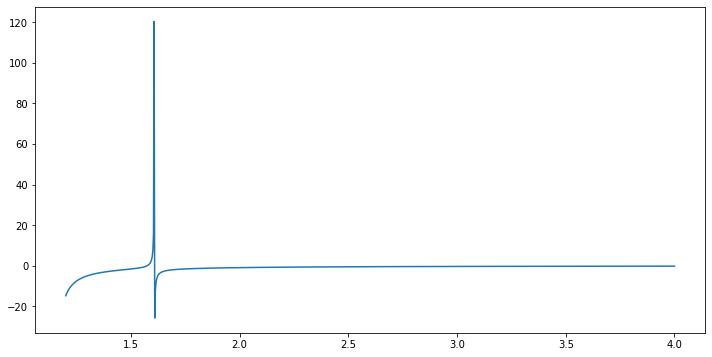

In [655]:
# Plotting it
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(omegas_many, alphas_many)

remember there was a singularity around 1.6 so lets not go over that or it will distort the polynomium approximation. I choose 1.5 which gives us x points to work with:

In [698]:
omegas_g = omegas_many[omegas_many < 1.5]
alphas_g = np.array(alphas_many)[omegas_many < 1.5]
print(f'We are working with {len(omegas_g)} points to fit')

We are working with 108 points to fit


now lets construct the matrix A according to the example on p. 107

Our matrix will thus be consisting of 108 rows since we have 108 points to fit to. Each row will consist of
1, omega, omega^2, omega^3 when choosing n=4, meaning we have 4 columns and the matrix will be of shape 108,4

omega are the first coordinate in the plot above, and will thus be the elements in the list omegas_g. 

Our right hand side vector b will be a columnvector with 108 entries, consisting of the second coordinates aka the elements in the list alhas_g.

the solution vector x we want to find holds the coefficient of our polynomium.

In [705]:
# Construct columns
col0 = np.ones_like(omegas_g)
col1 = omegas_g
col2 = omegas_g**2
col3 = omegas_g**3
col4 = omegas_g**4

# Construct matrix A
A_g = np.column_stack([col0,col1,col2,col3])

# Let matrix b bbe the alphas
B_g = alphas_g

# Solve with least squares
coef1 = least_squares(A_g,B_g)
print(coef1)

# Create function
def pol(x, a, b, c, d):
    return a + b*x + c*x**2 + d*x**3

alphas_P1 = pol(omegas_g, *coef1)

[-3008.0371602   6406.93938819 -4558.13439385  1082.17381939]


In [706]:
# Construct columns
col0 = np.ones_like(omegas_g)
col1 = omegas_g
col2 = omegas_g**2
col3 = omegas_g**3
col4 = omegas_g**4
col5 = omegas_g**5

# Construct matrix A
A_g = np.column_stack([col0,col1,col2,col3,col4,col5])

# Let matrix b bbe the alphas
B_g = alphas_g

# Solve with least squares
coef2 = least_squares(A_g,B_g)
print(coef1)

# Create function
def pol(x, a, b, c, d, e, f):
    return a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5

alphas_P2 = pol(omegas_g, *coef2)

[-3008.0371602   6406.93938819 -4558.13439385  1082.17381939]


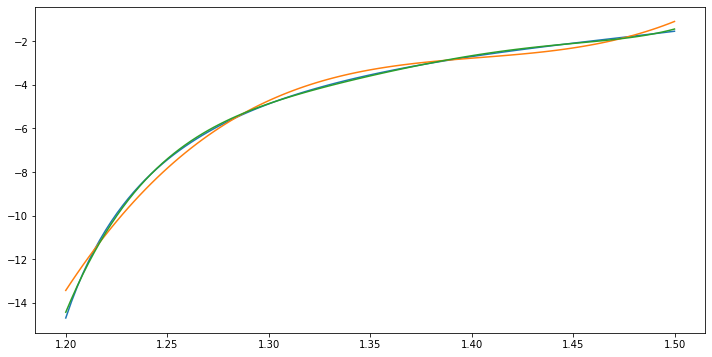

In [707]:
# Plot
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(omegas_g, alphas_g)
ax.plot(omegas_g, alphas_P1)
ax.plot(omegas_g, alphas_P2)

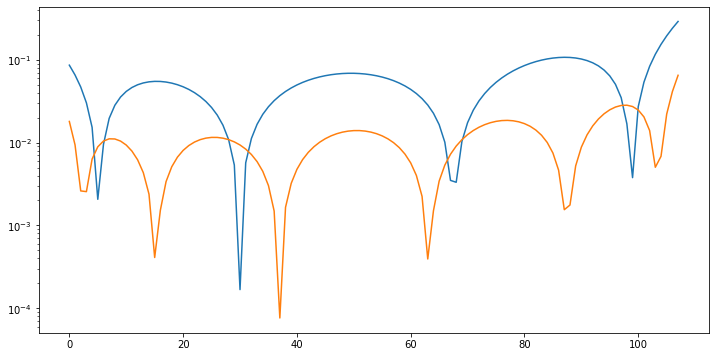

In [708]:
# Plot
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(abs((alphas_P1-alphas_g)/alphas_g))
ax.plot(abs((alphas_P2-alphas_g)/alphas_g))
ax.set_yscale('log')

missing one exponent thing

## h(1)

In [717]:
alhas_many = np.array(alphas_many)

# Construct columns
col0 = np.ones_like(omegas_many)
col1 = omegas_many
col2 = omegas_many**2
col3 = -alhas_many*omegas_many
col4 = -alhas_many*omegas_many**2

# Construct matrix A
A_h = np.column_stack([col0,col1,col2,col3,col4])

# Let matrix b bbe the alphas
B_h = alphas_many

# Solve with least squares
coef_h1 = least_squares(A_h,B_h)
print(coef_h1)

# Create function
def Q_approx(x, a1, a2, a3, b1, b2):
    alpha = solve_alpha(x)
    a_term = a1 + a2*x + a3*x**2
    b_term = b1*alpha*x + b2*alpha*x**2
    return a_term - b_term

alphas_Q1 = np.array([Q_approx(omegas_many[i], *coef_h1) for i in range(len(omegas_many))])

[ 0.73245626 -0.56503326  0.06227827 -1.48274436  0.53544673]


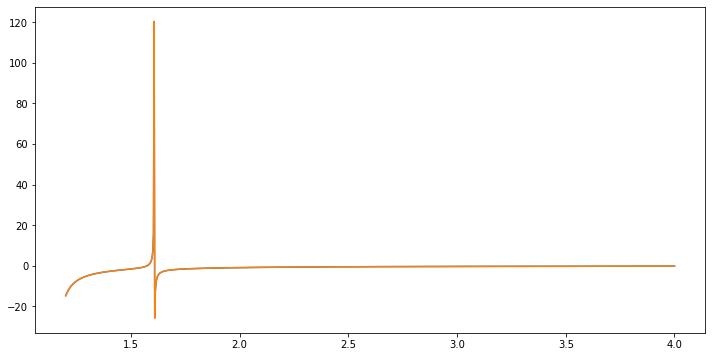

In [720]:
# Plot
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(omegas_many, alphas_many)
ax.plot(omegas_many, alphas_Q1)

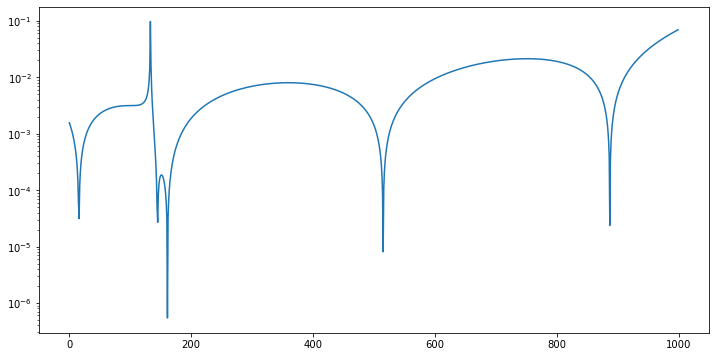

In [722]:
# Plot
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(abs((alphas_Q1-alphas_many)/alphas_many))
ax.set_yscale('log')

## h(4)

In [741]:
# Calculate alhpas in -4 to 4 interval
omegas_44 = np.linspace(-4,4,3000)
alphas_44 = np.array([solve_alpha(omegas_44[i]) for i in range(3000)])

In [745]:
# Construct columns
col0 = np.ones_like(omegas_44)
col1 = omegas_44
col2 = omegas_44**2
col3 = omegas_44**3
col4 = omegas_44**4
col5 = -alphas_44*omegas_44
col6 = -alphas_44*omegas_44**2
col7 = -alphas_44*omegas_44**3
col8 = -alphas_44*omegas_44**4

# Construct matrix A
A_h = np.column_stack([col0,col1,col2,col3,col4, col5, col6, col7, col8])

# Let matrix b bbe the alphas
B_h = alphas_44

# Solve with least squares
coef_h2 = least_squares(A_h,B_h)
print(coef_h2)

# Create function
def Q_approx2(x, a1, a2, a3, a4, a5, b1, b2, b3, b4):
    alpha = solve_alpha(x)
    a_term = a1 + a2*x + a3*x**2 +a4*x**3 + a5*x**4
    b_term = b1*alpha*x + b2*alpha*x**2 + b3*alpha*x**3 + b4*alpha*x**4
    return a_term - b_term

alphas_Q2 = np.array([Q_approx2(omegas_44[i], *coef_h2) for i in range(len(omegas_44))])

[ 9.26078292e-01 -2.38787989e-12 -1.59377159e+00  1.29075733e-14
 -2.08566822e-03 -1.46617475e-12 -1.84239903e+00  1.01805229e-12
  7.69065473e-01]


(-20.0, 40.0)

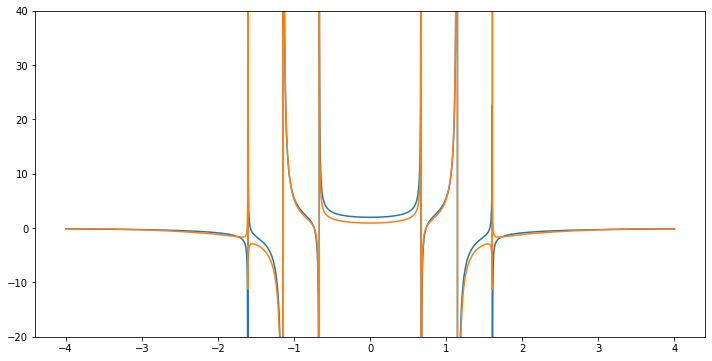

In [746]:
# Plot
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(omegas_44, alphas_44)
ax.plot(omegas_44, alphas_Q2)
#ax.set_xlim(1.2,4)
ax.set_ylim(-20,40)

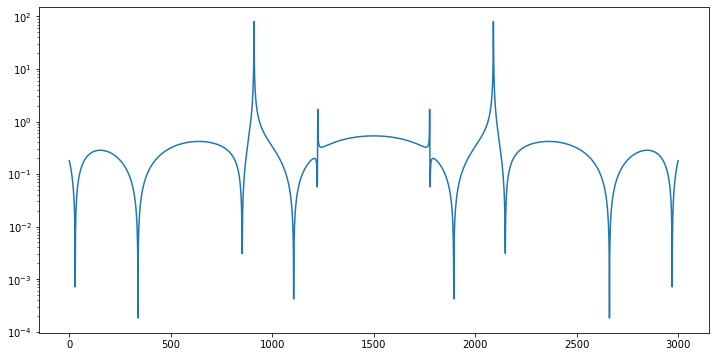

In [748]:
# Plot
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(abs((alphas_Q2-alphas_44)/alphas_44))
ax.set_yscale('log')